In [ ]:
import numpy as np 
import pandas as pd 

In [ ]:
abnormal = pd.read_csv("ptbdb_abnormal.csv", header = None) 
normal = pd.read_csv("ptbdb_normal.csv", header = None)

abnormal = abnormal.drop([187], axis=1)
normal = normal.drop([187], axis=1)

abnormal.head

<bound method NDFrame.head of             0         1         2         3    ...  183  184  185  186
0      0.932233  0.869679  0.886186  0.929626  ...  0.0  0.0  0.0  0.0
1      1.000000  0.606941  0.384181  0.254237  ...  0.0  0.0  0.0  0.0
2      1.000000  0.951613  0.923963  0.853303  ...  0.0  0.0  0.0  0.0
3      0.977819  0.899261  0.230129  0.032348  ...  0.0  0.0  0.0  0.0
4      0.935618  0.801661  0.805815  1.000000  ...  0.0  0.0  0.0  0.0
...         ...       ...       ...       ...  ...  ...  ...  ...  ...
10501  0.981409  1.000000  0.559171  0.287093  ...  0.0  0.0  0.0  0.0
10502  0.906250  0.922379  0.878024  0.810484  ...  0.0  0.0  0.0  0.0
10503  1.000000  0.867971  0.674122  0.470332  ...  0.0  0.0  0.0  0.0
10504  1.000000  0.984672  0.658888  0.556394  ...  0.0  0.0  0.0  0.0
10505  0.997886  0.700317  0.464059  0.318182  ...  0.0  0.0  0.0  0.0

[10506 rows x 187 columns]>

In [ ]:
import matplotlib.pyplot as plt

(682890,)


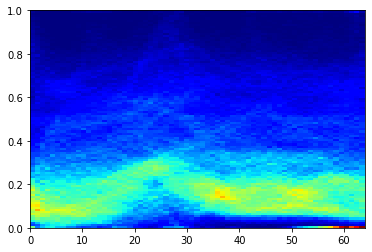

In [ ]:
flatten_ab_y = (abnormal.values)
flatten_ab_y  = flatten_ab_y[:,5:70].flatten()

print(flatten_ab_y.shape)

ab_x=np.arange(0,65)
ab_x = np.tile(ab_x, abnormal.shape[0])

plt.hist2d(ab_x, flatten_ab_y, bins = (65,100), cmap = plt.cm.jet) 

plt.show()

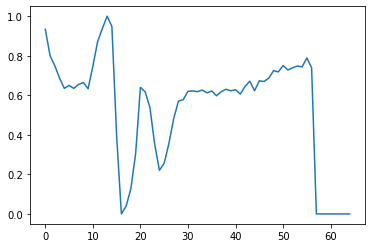

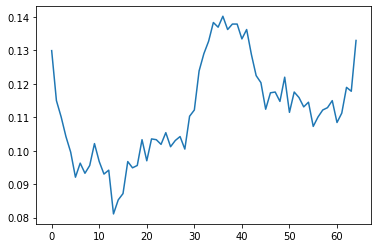

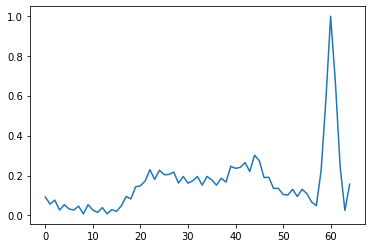

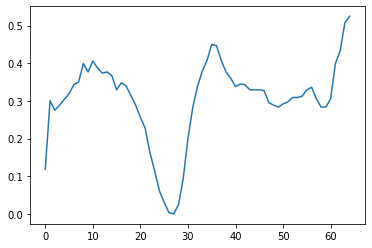

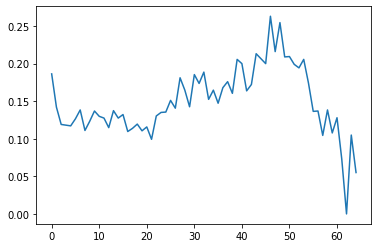

In [ ]:
plt.plot((abnormal.values)[0][5:70])
plt.show()

plt.plot((abnormal.values)[50][5:70])
plt.show()

plt.plot((abnormal.values)[117][5:70])
plt.show()

plt.plot((abnormal.values)[1111][5:70])
plt.show()

plt.plot((abnormal.values)[100][5:70])
plt.show()

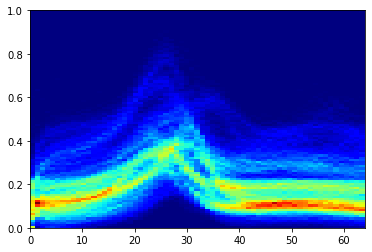

In [ ]:
flatten_norm_y = normal.values
flatten_norm_y  = flatten_norm_y[:,5:70].flatten()

norm_x=np.arange(0,65)
norm_x = np.tile(norm_x, normal.shape[0])

plt.hist2d(norm_x,flatten_norm_y, bins=(65,100), cmap=plt.cm.jet)
plt.show()


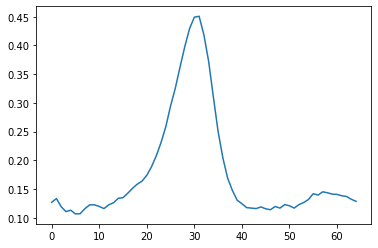

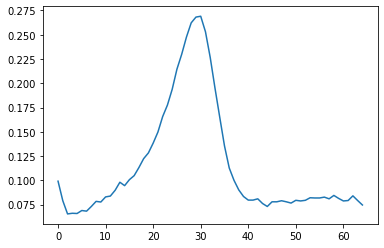

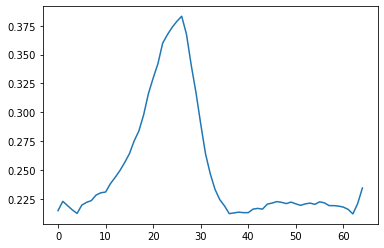

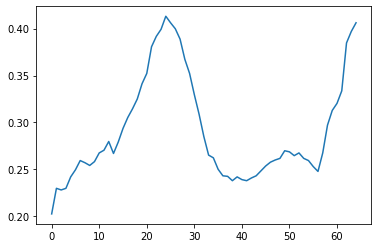

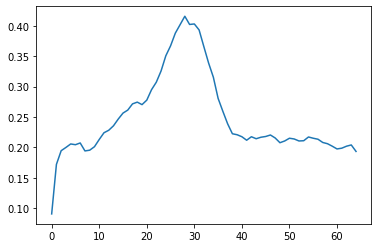

In [ ]:
plt.plot((normal.values)[0][5:70])
plt.show()

plt.plot((normal.values)[50][5:70])
plt.show()

plt.plot((normal.values)[117][5:70])
plt.show()

plt.plot((normal.values)[1111][5:70])
plt.show()

plt.plot((normal.values)[100][5:70])
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y_abnormal = np.ones((abnormal.shape[0]))
y_abnormal = pd.DataFrame(y_abnormal)

y_normal = np.zeros((normal.shape[0]))
y_normal = pd.DataFrame(y_normal)

X = pd.concat([abnormal, normal], sort=True)
y = pd.concat([y_abnormal, y_normal] ,sort=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
abnormal.shape

(10506, 187)

In [ ]:
normal.shape

(4046, 187)

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout

In [ ]:
#Reshape train and test data to (n_samples, 187, 1), where each sample is of size (187, 1)
X_train = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)

print("Train shape: ", X_train.shape)
print("Test shape: ", X_test.shape)

Train shape:  (11641, 187, 1)
Test shape:  (2911, 187, 1)


In [ ]:
# Create sequential model 
clf = tf.keras.models.Sequential()

In [ ]:
#First CNN layer  with 32 filters, conv window 5, relu activation and same padding
clf.add(Conv1D(filters=32, kernel_size=(5,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001), input_shape = (X_train.shape[1],1)))

In [ ]:
#Second CNN layer  with 64 filters, conv window 5, relu activation and same padding
clf.add(Conv1D(filters=64, kernel_size=(5,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001)))


In [ ]:
#Third CNN layer with 64 filters, conv window 5, relu activation and same padding
clf.add(Conv1D(filters=128, kernel_size=(5,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001)))

In [ ]:
#Fourth CNN layer with Max pooling
clf.add(MaxPool1D(pool_size=(5,), strides=2, padding='same'))
clf.add(Dropout(0.5))

In [ ]:
#Flatten the output
clf.add(Flatten())

In [ ]:
#Add a dense layer with 512 neurons
clf.add(Dense(units = 512, activation=tf.keras.layers.LeakyReLU(alpha=0.001)))

In [ ]:
#Add a dense layer with 1024 neurons
clf.add(Dense(units = 1024, activation=tf.keras.layers.LeakyReLU(alpha=0.001)))

In [ ]:
#Softmax as last layer with two outputs
clf.add(Dense(units = 2, activation='softmax'))

In [ ]:
clf.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
clf.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 187, 32)           192       
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 187, 64)           10304     
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 187, 128)          41088     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 94, 128)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 94, 128)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12032)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)              

In [ ]:
history = clf.fit(X_train, y_train, epochs = 10)
y_pred = clf.predict(X_test)

Epoch 1/10
364/364 [==============================] - 46s 124ms/step - loss: 0.3931 - accuracy: 0.8132
Epoch 2/10
364/364 [==============================] - 45s 124ms/step - loss: 0.1675 - accuracy: 0.9343
Epoch 3/10
364/364 [==============================] - 45s 123ms/step - loss: 0.0882 - accuracy: 0.9689
Epoch 4/10
364/364 [==============================] - 45s 123ms/step - loss: 0.0564 - accuracy: 0.9813
Epoch 5/10
364/364 [==============================] - 45s 123ms/step - loss: 0.0370 - accuracy: 0.9883
Epoch 6/10
364/364 [==============================] - 44s 122ms/step - loss: 0.0274 - accuracy: 0.9898
Epoch 7/10
364/364 [==============================] - 45s 122ms/step - loss: 0.0278 - accuracy: 0.9922
Epoch 8/10
364/364 [==============================] - 44s 122ms/step - loss: 0.0169 - accuracy: 0.9945
Epoch 9/10
364/364 [==============================] - 45s 122ms/step - loss: 0.0288 - accuracy: 0.9893
Epoch 10/10
364/364 [==============================] - 45s 123ms/step - l